ToggleButtons(description='Actions:', options=('Move Up', 'Move Down', 'Move Left', 'Move Right'), value='Move…

Output()

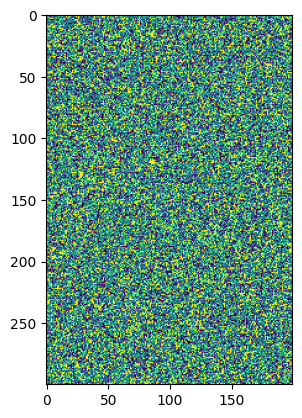

In [2]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Define colors
WHITE = 0
GREEN = 1
YELLOW = 2
RED = 3

# Define map dimensions
WIDTH = 200
HEIGHT = 300

class ASVEnvironment(gym.Env):
    def __init__(self):
        super(ASVEnvironment, self).__init__()
        
        # Define the action and observation space
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(4)
        
        # Define the map grid with initial configuration
        self.map_grid = np.random.choice([WHITE, GREEN, YELLOW, RED], size=(WIDTH, HEIGHT))
        
        # Initialize the agent position randomly
        self.agent_position = (np.random.randint(0, WIDTH), np.random.randint(0, HEIGHT))
        self.map_grid[self.agent_position] = WHITE
        
        # Initialize the figure for rendering
        self.fig, self.ax = plt.subplots()
        self.img = self.ax.imshow(self.map_grid.T, cmap='viridis')
    
    def step(self, action):
        # Execute the action and update the environment
        self.agent_position = (self.agent_position[0] + np.random.randint(-1, 2),
                               self.agent_position[1] + np.random.randint(-1, 2))
        
        self.agent_position = (np.clip(self.agent_position[0], 0, WIDTH-1),
                               np.clip(self.agent_position[1], 0, HEIGHT-1))
        
        self.map_grid[self.agent_position] = WHITE
        observation = self.map_grid[self.agent_position]
        reward = 0
        done = False
        info = {}
        
        return observation, reward, done, info
    
    def reset(self):
        self.map_grid = np.random.choice([WHITE, GREEN, YELLOW, RED], size=(WIDTH, HEIGHT))
        self.agent_position = (np.random.randint(0, WIDTH), np.random.randint(0, HEIGHT))
        self.map_grid[self.agent_position] = WHITE
        
        return self.map_grid[self.agent_position]
    
    def render(self, mode='human'):
        self.img.set_data(self.map_grid.T)
        plt.pause(0.1)
        plt.draw()
    
    def close(self):
        plt.close()

# Create the ASV environment
env = ASVEnvironment()

# Create a widget for taking random actions
action_widget = widgets.ToggleButtons(options=['Move Up', 'Move Down', 'Move Left', 'Move Right'],
                                      description='Actions:', button_style='')
output = widgets.Output()

display(action_widget, output)

# Function to handle action on button click
def on_action_button_click(b):
    action = action_widget.index
    observation, reward, done, _ = env.step(action)
    env.render()

# Link the button click event to the action function
action_widget.observe(on_action_button_click, names='value')
